#**Multinomial Naive Bayes classifier for QuBAN Dataset of Questions**

#Dataset Initialization

In [ ]:
# @title Module Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.ndimage import gaussian_filter

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# @title Importing Dataset from Drive

file_path = 'drive/My Drive/Categorized Questions Dataset QuBAN.xlsx'

cis101_df = pd.read_excel(file_path, sheet_name="CIS101 Questions")
cis101_df['course'] = 'CIS101'

csc203_df = pd.read_excel(file_path, sheet_name="CSC203 Questions")
csc203_df['course'] = 'CSC203'

off_topic_df = pd.read_excel(file_path, sheet_name="Off-Topic Questions")
off_topic_df['Topic'] = 'Off-Topic'
off_topic_df = off_topic_df[['Topic', 'Question']].rename(columns={'Question': 'Questions'})
off_topic_df['course'] = 'General'

In [ ]:
cis101_head = cis101_df.head()
csc203_head = csc203_df.head()
off_topic_head = off_topic_df.head()

In [ ]:
cis101_head

,Topic,Score,Questions,course
0,Computing Mechanism,5,What is the difference between symmetric multi...,CIS101
1,Computing Mechanism,5,"What are Python descriptors, and how do they w...",CIS101
2,Computing Mechanism,20,What is the principle behind optical computing...,CIS101
3,Computing Mechanism,20,What is the name of the technique that uses mu...,CIS101
4,Computing Mechanism,20,What are the challenges and limitations of imp...,CIS101


In [ ]:
csc203_head

,Topic,Score,Questions,course
0,Binary Search Tree,5,What is the difference between recursion & bst?,CSC203
1,Binary Search Tree,5,What are the differences between a binary sear...,CSC203
2,Binary Search Tree,5,"How does the concept of ""tree rotation"" work, ...",CSC203
3,Binary Search Tree,5,What is a binary search tree (BST) and how doe...,CSC203
4,Binary Search Tree,5,What is the significance of the binary search ...,CSC203


In [ ]:
off_topic_head

,Topic,Questions,course
0,Off-Topic,Before inserting into stack one must check the...,General
1,Off-Topic,Your thoughts on chatgpt.?,General
2,Off-Topic,Is socialism valid for everyone.?,General
3,Off-Topic,Is it bad to be stoned in classn.?,General
4,Off-Topic,DO YOU FEEL LIKE YOUVE LIVED THIS SAME DAY MAN...,General


In [ ]:
# @title Cleaning & Combining Datasets

def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

cis101_df['Questions'] = cis101_df['Questions'].apply(clean_text)
csc203_df['Questions'] = csc203_df['Questions'].apply(clean_text)
off_topic_df['Questions'] = off_topic_df['Questions'].apply(clean_text)

combined_df = pd.concat([
    cis101_df[['Questions','course']],
    csc203_df[['Questions','course']],
    off_topic_df[['Questions','course']]
], ignore_index=True)

#Training

In [ ]:
X = combined_df['Questions']
X.tolist()[0:5]

['what is the difference between symmetric multiprocessing smp and asymmetric multiprocessing amp',
 'what are python descriptors and how do they work',
 'what is the principle behind optical computing which uses light instead of electricity to perform computations',
 'what is the name of the technique that uses multiple computing mechanisms to work on the same problem in parallel increasing the speed and reliability of the solution',
 'what are the challenges and limitations of implementing quantum computing in practice']

In [ ]:
y = combined_df['course']
y

0        CIS101
1        CIS101
2        CIS101
3        CIS101
4        CIS101
         ...   
9231    General
9232    General
9233    General
9234    General
9235    General
Name: course, Length: 9236, dtype: object

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return " ".join(stemmed_tokens)

X_preprocessed = [preprocess_text(text) for text in X]
X_preprocessed[0:5]

['differ symmetr multiprocess smp asymmetr multiprocess amp',
 'python descriptor work',
 'principl behind optic comput use light instead electr perform comput',
 'name techniqu use multipl comput mechan work problem parallel increas speed reliabl solut',
 'challeng limit implement quantum comput practic']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
X_train[0:5]

['identifi recurs problem',
 'way reenact recreat past scientif experi contribut deeper understand scientif process evolut',
 'effect instagram like selfesteem young children age',
 'chang topic research semest',
 'doubli link list use implement data structur like dequ memori alloc']

In [ ]:
y_train[0:5]

3021     CSC203
8486    General
5012    General
1729     CIS101
2107     CSC203
Name: course, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_transformed, y_train)

MultinomialNB()

In [ ]:
X_test_transformed = vectorizer.transform(X_test)

y_pred = classifier.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8003246753246753


#Prediction

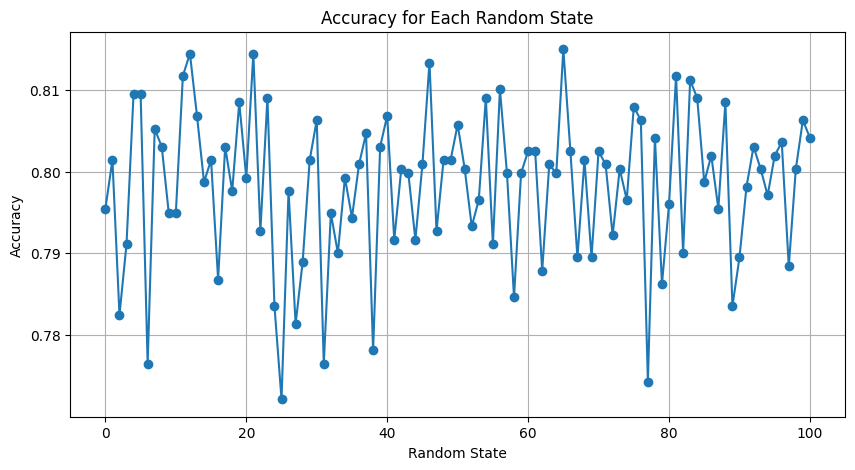

In [ ]:
# @title Accuracy For Each Random State

accuracies = []
random_states = range(0, 101)

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=state)

    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)

    classifier = MultinomialNB()
    classifier.fit(X_train_transformed, y_train)

    X_test_transformed = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(random_states, accuracies, marker='o')
plt.title('Accuracy for Each Random State')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

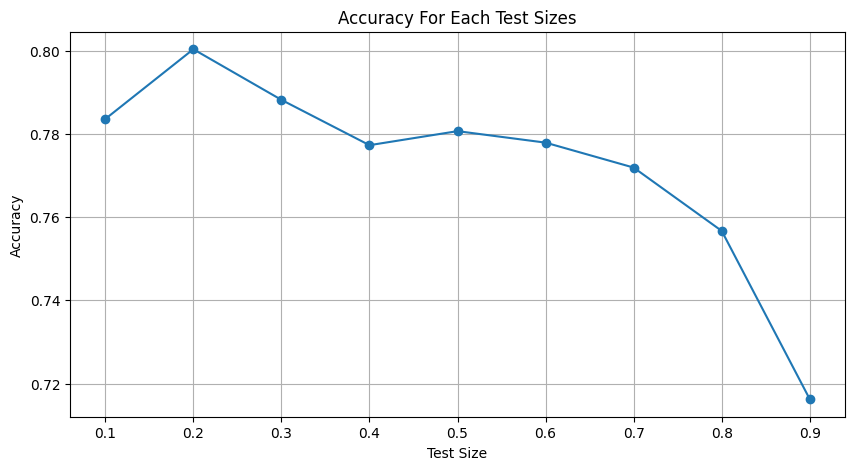

In [ ]:
# @title Accuracy For Each Test Sizes

accuracies = []
test_sizes = np.linspace(0.1, 0.9, 9)

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=size, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)

    classifier = MultinomialNB()
    classifier.fit(X_train_transformed, y_train)

    X_test_transformed = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(test_sizes, accuracies, marker='o')
plt.title('Accuracy For Each Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

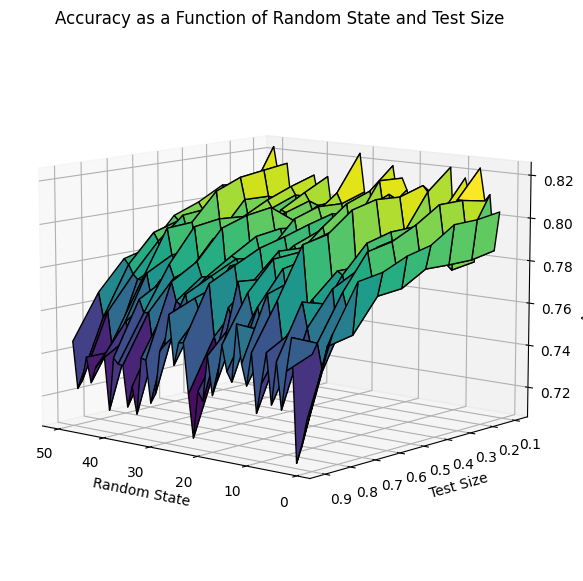

In [ ]:
# @title 3D Plot for accuracy compared to test_size and random state

random_states = range(1, 51)
test_sizes = np.linspace(0.1, 0.9, 9)

accuracies = np.zeros((len(random_states), len(test_sizes)))

for i, state in enumerate(random_states):
    for j, test_size in enumerate(test_sizes):
        X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=test_size, random_state=state)

        vectorizer = TfidfVectorizer()
        X_train_transformed = vectorizer.fit_transform(X_train)

        classifier = MultinomialNB()
        classifier.fit(X_train_transformed, y_train)

        X_test_transformed = vectorizer.transform(X_test)
        y_pred = classifier.predict(X_test_transformed)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies[i, j] = accuracy

X, Y = np.meshgrid(random_states, test_sizes)
Z = accuracies.T

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=130)
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
ax.set_xlabel('Random State')
ax.set_ylabel('Test Size')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy as a Function of Random State and Test Size')
plt.show()

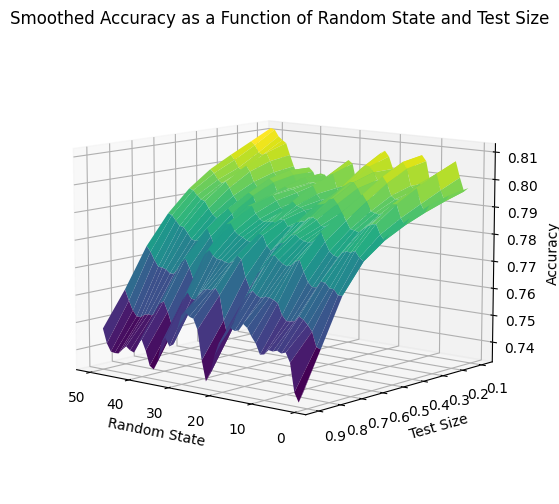

In [ ]:
# @title Smoothed 3D Plot

smoothed_accuracies = gaussian_filter(accuracies, sigma=1)
X, Y = np.meshgrid(random_states, test_sizes)
Z = smoothed_accuracies.T

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=130)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Random State')
ax.set_ylabel('Test Size')
ax.set_zlabel('Accuracy')
ax.set_title('Smoothed Accuracy as a Function of Random State and Test Size')
plt.show()

In [ ]:
# @title Statistics for maximum achieved accuracy

# Find the index of the maximum accuracy value
max_index = np.unravel_index(np.argmax(accuracies, axis=None), accuracies.shape)

# Retrieve the corresponding random_state and test_size values
max_random_state = random_states[max_index[0]]
max_test_size = test_sizes[max_index[1]]
max_accuracy = accuracies[max_index]

print("Global peak accuracy:", max_accuracy)
print("Random State at global peak:", max_random_state)
print("Test Size at global peak:", max_test_size)

Global peak accuracy: 0.8235930735930735
Random State at global peak: 30
Test Size at global peak: 0.1


In [ ]:
# @title Top 10 states at which maximum accuracy is achieved

# Flatten the accuracies array and get the indices of the top 10 accuracy values
top_10_indices = np.unravel_index(np.argsort(accuracies.ravel())[-10:], accuracies.shape)

# Retrieve the corresponding random_state, test_size, and accuracy values
top_10_random_states = [random_states[i] for i in top_10_indices[0]]
top_10_test_sizes = [test_sizes[i] for i in top_10_indices[1]]
top_10_accuracies = [accuracies[i, j] for i, j in zip(top_10_indices[0], top_10_indices[1])]

print("Top 10 Global Peaks:")
for i in range(10):
    print(f"{i+1}. Random State: {top_10_random_states[i]}, Test Size: {top_10_test_sizes[i]}, Accuracy: {top_10_accuracies[i]}")

Top 10 Global Peaks:
1. Random State: 21, Test Size: 0.1, Accuracy: 0.8138528138528138
2. Random State: 21, Test Size: 0.2, Accuracy: 0.8143939393939394
3. Random State: 12, Test Size: 0.2, Accuracy: 0.8143939393939394
4. Random State: 46, Test Size: 0.1, Accuracy: 0.814935064935065
5. Random State: 8, Test Size: 0.1, Accuracy: 0.8170995670995671
6. Random State: 23, Test Size: 0.1, Accuracy: 0.8192640692640693
7. Random State: 11, Test Size: 0.1, Accuracy: 0.8214285714285714
8. Random State: 49, Test Size: 0.1, Accuracy: 0.8225108225108225
9. Random State: 5, Test Size: 0.1, Accuracy: 0.8225108225108225
10. Random State: 30, Test Size: 0.1, Accuracy: 0.8235930735930735
